# 10-K Filings of Top 3 Companies for the last three fiscal years

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv(r'C:\Users\malav\OneDrive\Desktop\10K_Filings.csv')

In [104]:
cols_to_convert = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow']
for col in cols_to_convert:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

## 1. Total Revenue Generated By Each Company

### Apple Company is generating the highest Revenue

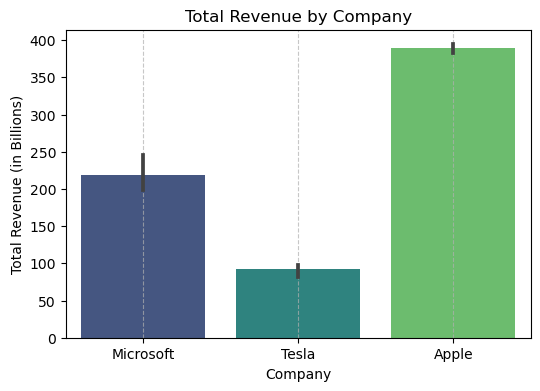

In [105]:
df['Total Revenue (Billions)'] = df['Total Revenue'] / 1000

plt.figure(figsize=(6, 4))
sns.barplot(x='Company', y='Total Revenue (Billions)', data=df, palette='viridis')
plt.xlabel('Company')
plt.ylabel('Total Revenue (in Billions)')
plt.title('Total Revenue by Company')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 2.Yearly Revenue Growth 

### Compare to last years data, Tesla has decreased its Revenue growth

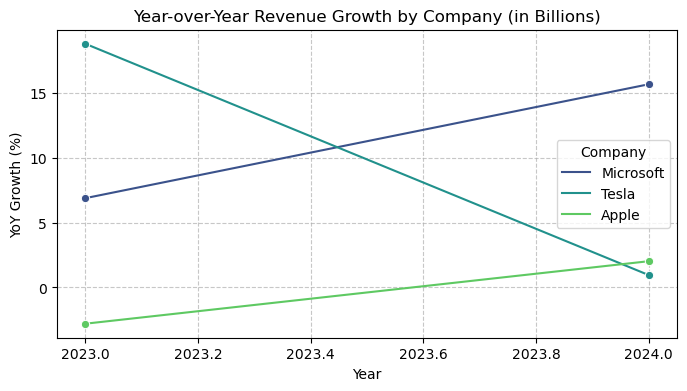

In [106]:
df['Previous Year Revenue'] = df.groupby('Company')['Total Revenue (Billions)'].shift(1)
df['YoY Growth'] = ((df['Total Revenue (Billions)'] - df['Previous Year Revenue']) / df['Previous Year Revenue']) * 100

plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Year', y='YoY Growth', hue='Company', marker='o', palette='viridis')
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.title('Year-over-Year Revenue Growth by Company (in Billions)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Company')
plt.show()

### From past three years, Apple is the constant highest Revenue generating company

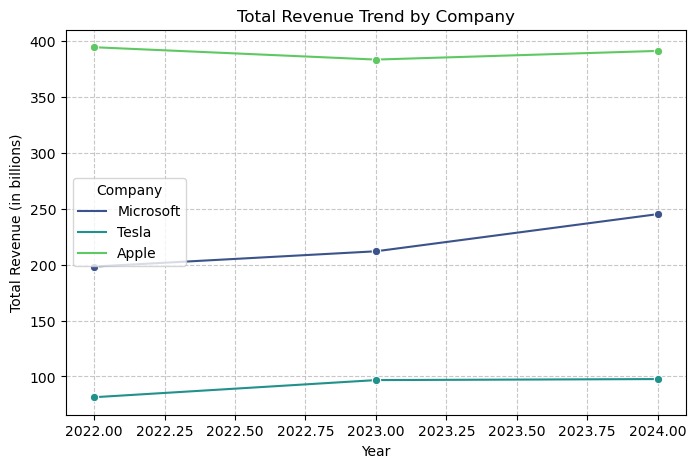

In [107]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Year', y='Total Revenue (Billions)', hue='Company', marker='o', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in billions)')
plt.title('Total Revenue Trend by Company')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Company')
plt.show()

## 3. Net Income by company

### Apple has highest Net Income followed by Microsoft
### Net Income is very less for Tesla Company

In [108]:
df['Net Income (Billions)'] = df['Net Income'] / 1000
company_income = df.groupby('Company')['Net Income (Billions)'].sum().reset_index()

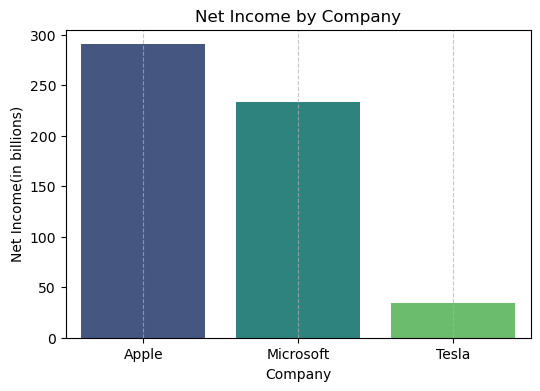

In [109]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Company', y='Net Income (Billions)', data=company_income, palette='viridis')
plt.xlabel('Company')
plt.ylabel('Net Income(in billions)')
plt.title('Net Income by Company')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 4.Net Income Margin

### Microsoft company is the one that is converting revenue into high profits.
### Tesla made less profits in 2024

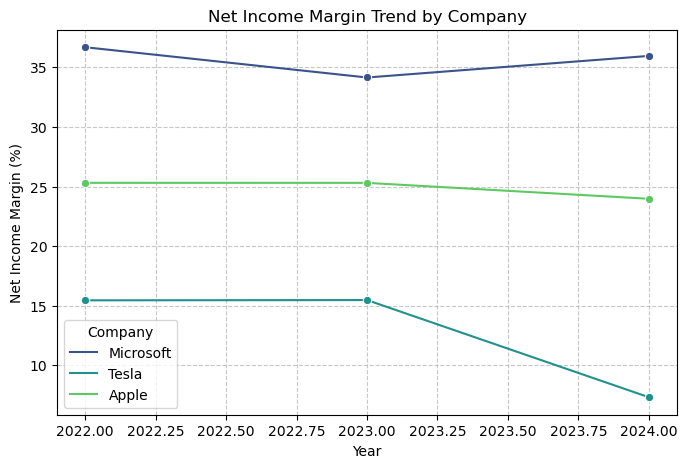

In [110]:
df['Net Income Margin'] = (df['Net Income (Billions)'] / df['Total Revenue (Billions)']) * 100
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Year', y='Net Income Margin', hue='Company', marker='o', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Net Income Margin (%)')
plt.title('Net Income Margin Trend by Company')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Company')
plt.show()

## 5. Assets vs. Liabilities 

### Assets are more compared to liabilities for all companies so no company is at risk.

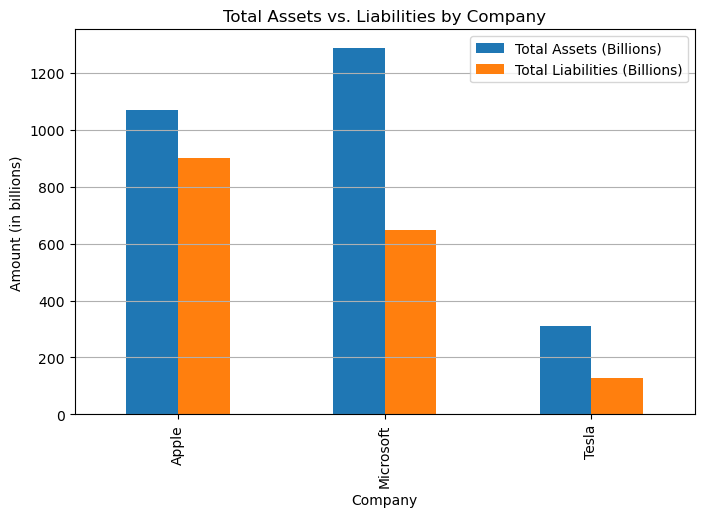

In [111]:
df['Total Assets (Billions)'] = df['Total Assets'] / 1000
df['Total Liabilities (Billions)'] = df['Total Liabilities'] / 1000
df_financials = df.groupby('Company')[['Total Assets (Billions)', 'Total Liabilities (Billions)']].sum()
df_financials['Solvency Ratio'] = df_financials['Total Assets (Billions)'] / df_financials['Total Liabilities (Billions)']
df_financials[['Total Assets (Billions)', 'Total Liabilities (Billions)']].plot(kind='bar', figsize=(8, 5))
plt.title("Total Assets vs. Liabilities by Company")
plt.ylabel("Amount (in billions)")
plt.grid(axis='y')
plt.show()

## 6. Return on Assets

### Apple assets are contributing for its revenue
### Tesla's revenue is based on assets
### Microsoft assets are contibuting less to its revenue

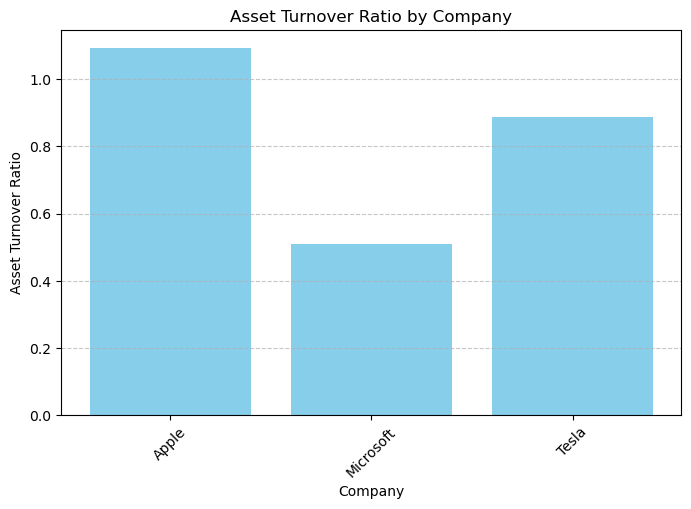

In [112]:
df_turnover = df.groupby('Company').apply(lambda x: x['Total Revenue (Billions)'].sum() / x['Total Assets (Billions)'].sum()).reset_index()
df_turnover.columns = ['Company', 'Asset Turnover Ratio']
plt.figure(figsize=(8, 5))
plt.bar(df_turnover['Company'], df_turnover['Asset Turnover Ratio'], color='skyblue')
plt.xlabel("Company")
plt.ylabel("Asset Turnover Ratio")
plt.title("Asset Turnover Ratio by Company")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## 7. Cash Flow from Operating Activities for each company over the years

### Apple generating the more cash flow every year
### In 2024, Apple and Microsoft both companies generated the more cash flow

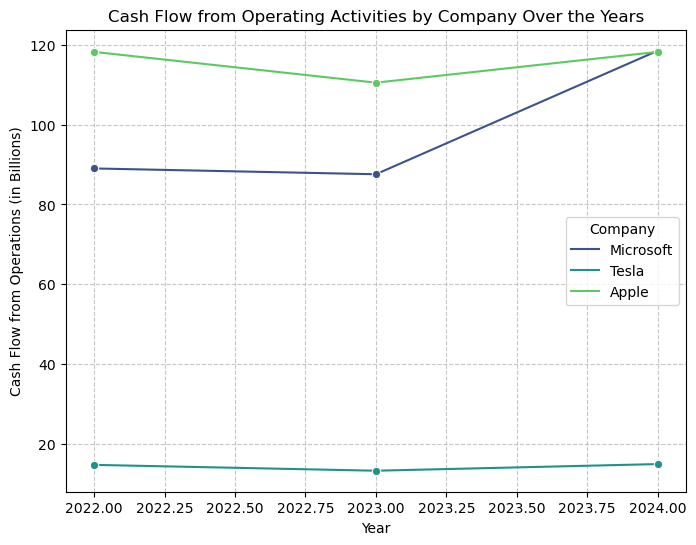

In [113]:
df['Cash Flow (Billions)'] = df['Cash Flow'] / 1000
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Year', y='Cash Flow (Billions)', hue='Company', marker='o', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Cash Flow from Operations (in Billions)')
plt.title('Cash Flow from Operating Activities by Company Over the Years')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Company')
plt.show()

## 8. Liquidity Analysis
### The companies are able to generate upto 50% cash flow even with Liabilities.

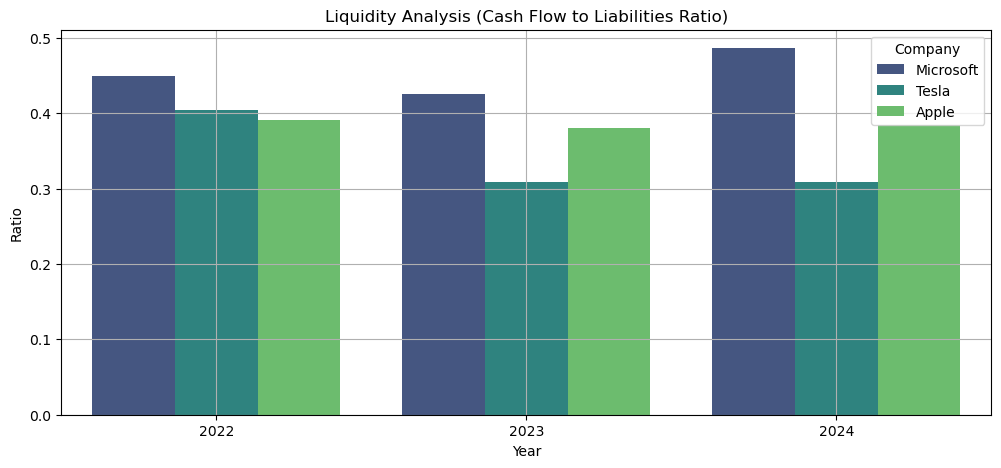

In [114]:
df['Cash Flow to Liabilities Ratio'] = df['Cash Flow (Billions)'] / df['Total Liabilities (Billions)']# Plot Cash Flow Changes

plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='Year', y='Cash Flow to Liabilities Ratio', hue='Company', palette='viridis')
plt.title('Liquidity Analysis (Cash Flow to Liabilities Ratio)')
plt.ylabel('Ratio')
plt.grid()
plt.show()